## The Data Collection: Titanic Dataset
We're going to analyse the famous Titanic dataset from Kaggle.  
We'll be trying to predict a classification- survival or deceased.     
Let's begin our understanding of implementing Logistic Regression in Python for classification

## Attribute Information:
1. survival	Survival	0 = No, 1 = Yes
2. pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
3. sex	Sex	
4. Age	Age in years	
5. sibsp	 of siblings / spouses aboard the Titanic	
6. parch	 of parents / children aboard the Titanic	
7. ticket	Ticket number	
8. fare	Passenger fare	
9. cabin	Cabin number	
10. embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#### Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/shreyask98/Data/main/titanic_train.csv")

### First look at data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

#### Checking the type of data we have:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see that 'Survived' 'Pclass', 'Parch' and 'SibSp' are object values but still they're in float datatype here, so that needs to be changed.

### Changing the datatypes of resp. columns:

In [6]:
train["Survived"] = train["Survived"].astype("O")
train["Pclass"] = train["Pclass"].astype("O")
train["SibSp"] = train["SibSp"].astype("O")
train["Parch"] = train["Parch"].astype("O")

In [7]:
train.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [8]:
# Describe categorical data
train.describe(include='O')

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,891,204,889
unique,2,3,891,2,7,7,681,147,3
top,0,3,"Braund, Mr. Owen Harris",male,0,0,347082,B96 B98,S
freq,549,491,1,577,608,678,7,4,644


In [9]:
# drop the useless columns that we know are not going to be good for prediction
train.drop(["Name","Ticket","Cabin","PassengerId"], axis=1, inplace=True)

In [10]:
# Report
## Dropping duplicates reduced null count.
train.duplicated().sum()

111

In [11]:
train.drop(train[train.duplicated()].index, inplace = True)

In [12]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

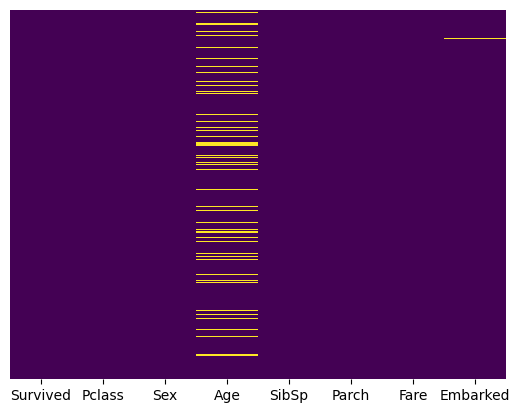

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
null_count = train.isna().sum()
null_percent = train.isna().sum()/len(train)*100
null = {'null': null_count,'null_percent':null_percent}
null_train = pd.DataFrame(null)
null_train

,null,null_percent
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,104,13.333333
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.256410


Approx 19.86 percent of the Age data is missing.    
Cabin column are just missing too much of that data.   
We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

### Analyzing discrete, continuous (numerical) and catagorical data:

In [15]:
categorical_features = train[[i for i in train.columns if train[i].dtype == 'O']]
numeric_features = train[[i for i in train.columns if train[i].dtype != 'O']]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features.columns), numeric_features.columns))
print('\nWe have {} categorical features : {}'.format(len(categorical_features.columns), categorical_features.columns))

We have 2 numerical features : Index(['Age', 'Fare'], dtype='object')

We have 6 categorical features : Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [16]:
train.skew()

Survived    0.354825
Pclass     -0.494364
Age         0.366978
SibSp       3.046805
Parch       2.624282
Fare        4.561010
dtype: float64

1. If skewness is less than 1 or greater than +1, the distribution is highly skewed.
2. If skewness is between 1 and  ½ or between +½ and +1, the distribution is moderately skewed.
3. If skewness is between  ½ and +½, the distribution is approximately symmetric.

In [17]:
train.kurtosis()

Survived    -1.878923
Pclass      -1.452747
Age          0.098771
SibSp       12.693940
Parch        8.909622
Fare        30.075101
dtype: float64

1. If skewness is less than 1 or greater than +1, the distribution is highly skewed.
2. If skewness is between 1 and  ½ or between +½ and +1, the distribution is moderately skewed.
3. If skewness is between  ½ and +½, the distribution is approximately symmetric.

## Exploratory Data Analysis(EDA)

#### Visualization of Target Column (Survived)

<AxesSubplot:xlabel='Survived', ylabel='count'>

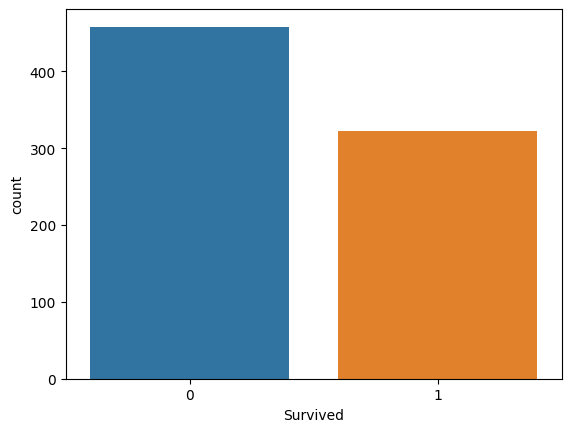

In [18]:
sns.countplot(x="Survived",data=train)

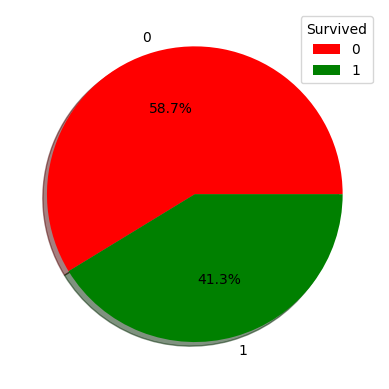

In [19]:
plt.pie(train['Survived'].value_counts(normalize=True),
       labels=train['Survived'].value_counts(normalize=True).index,
       autopct='%.1f%%',shadow=True,colors = ['red','green'])
plt.legend(title='Survived')

### Univariant Analysis

In [20]:


cat = [i for i in train.columns if train[i].dtype == 'O']
# cat.remove("Survived")
num = [i for i in train.columns if train[i].dtype != 'O']


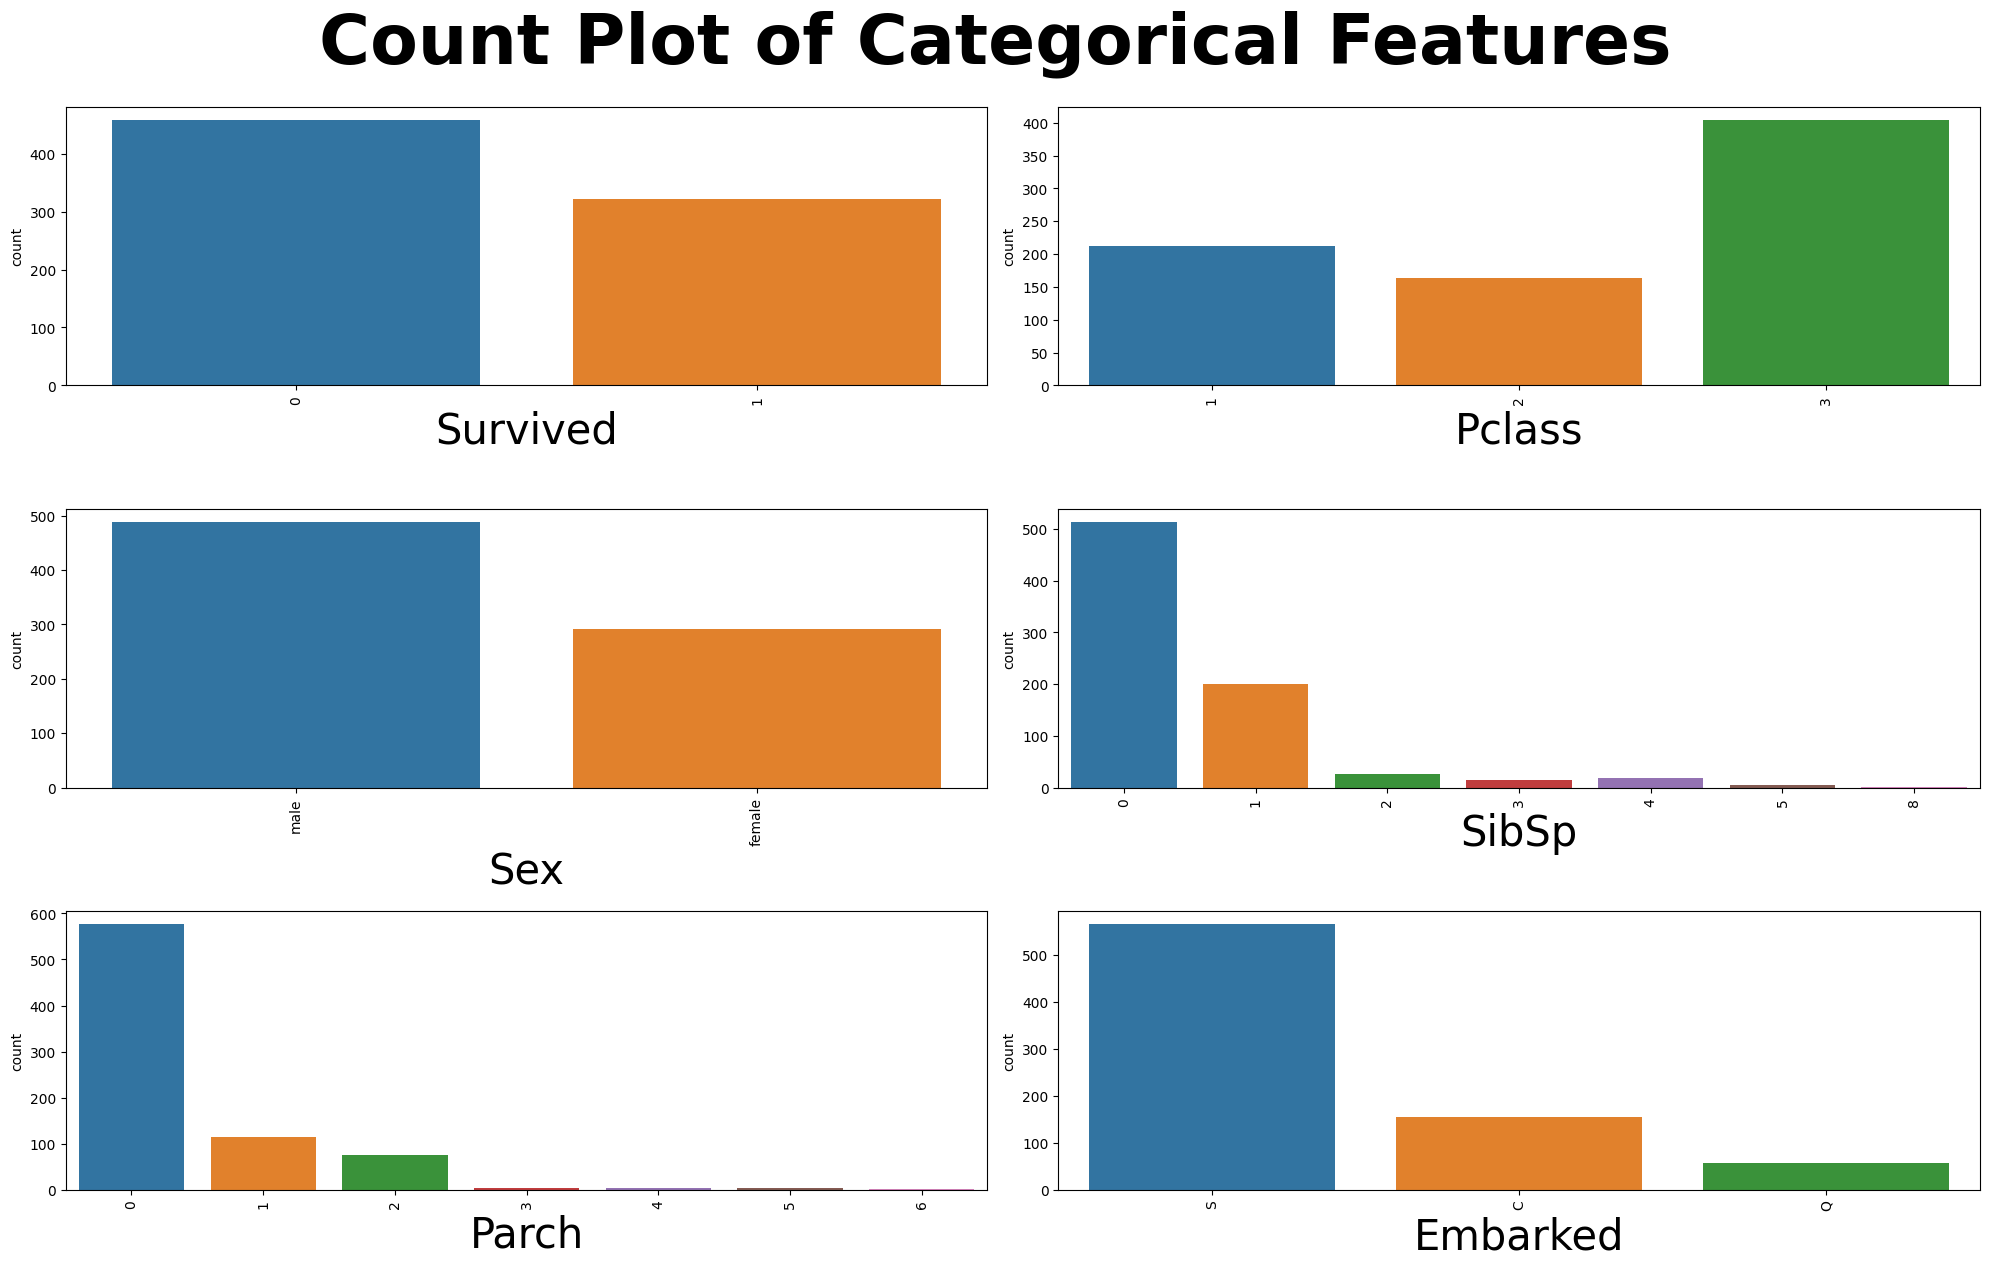

In [21]:
plt.figure(figsize=(20, 20))
plt.suptitle('Count Plot of Categorical Features', fontsize=50, fontweight='bold', alpha=1, y=1)

for i in range(0, len(cat)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=cat[i], data=train)
    plt.xlabel(cat[i],fontsize=30)
    plt.xticks(rotation=90)
    plt.tight_layout()

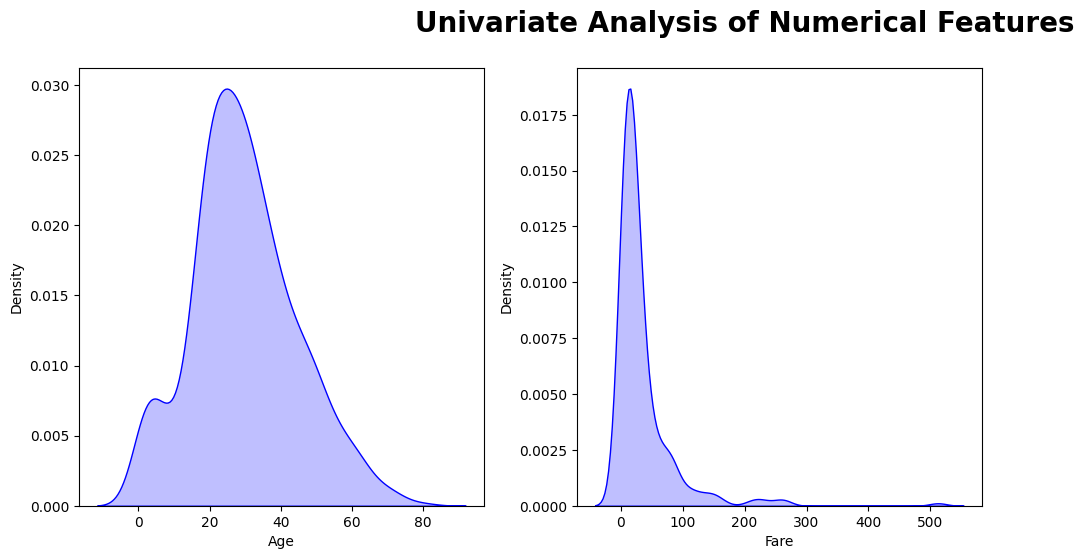

In [22]:
#Univariate Analysis of Numerical Features

plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=num[i],shade=True, color='b',data=train)
    plt.xlabel(num[i])
    plt.tight_layout()

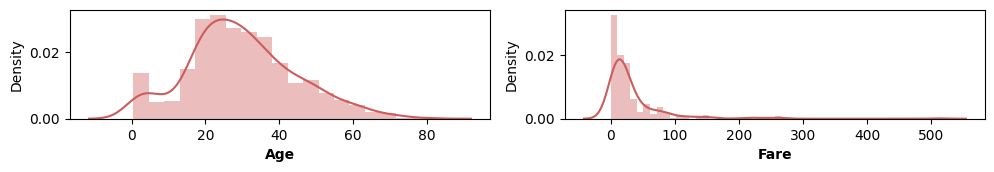

In [23]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=train[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report
NO colums are distributed except Age

### Bivariate Analysis


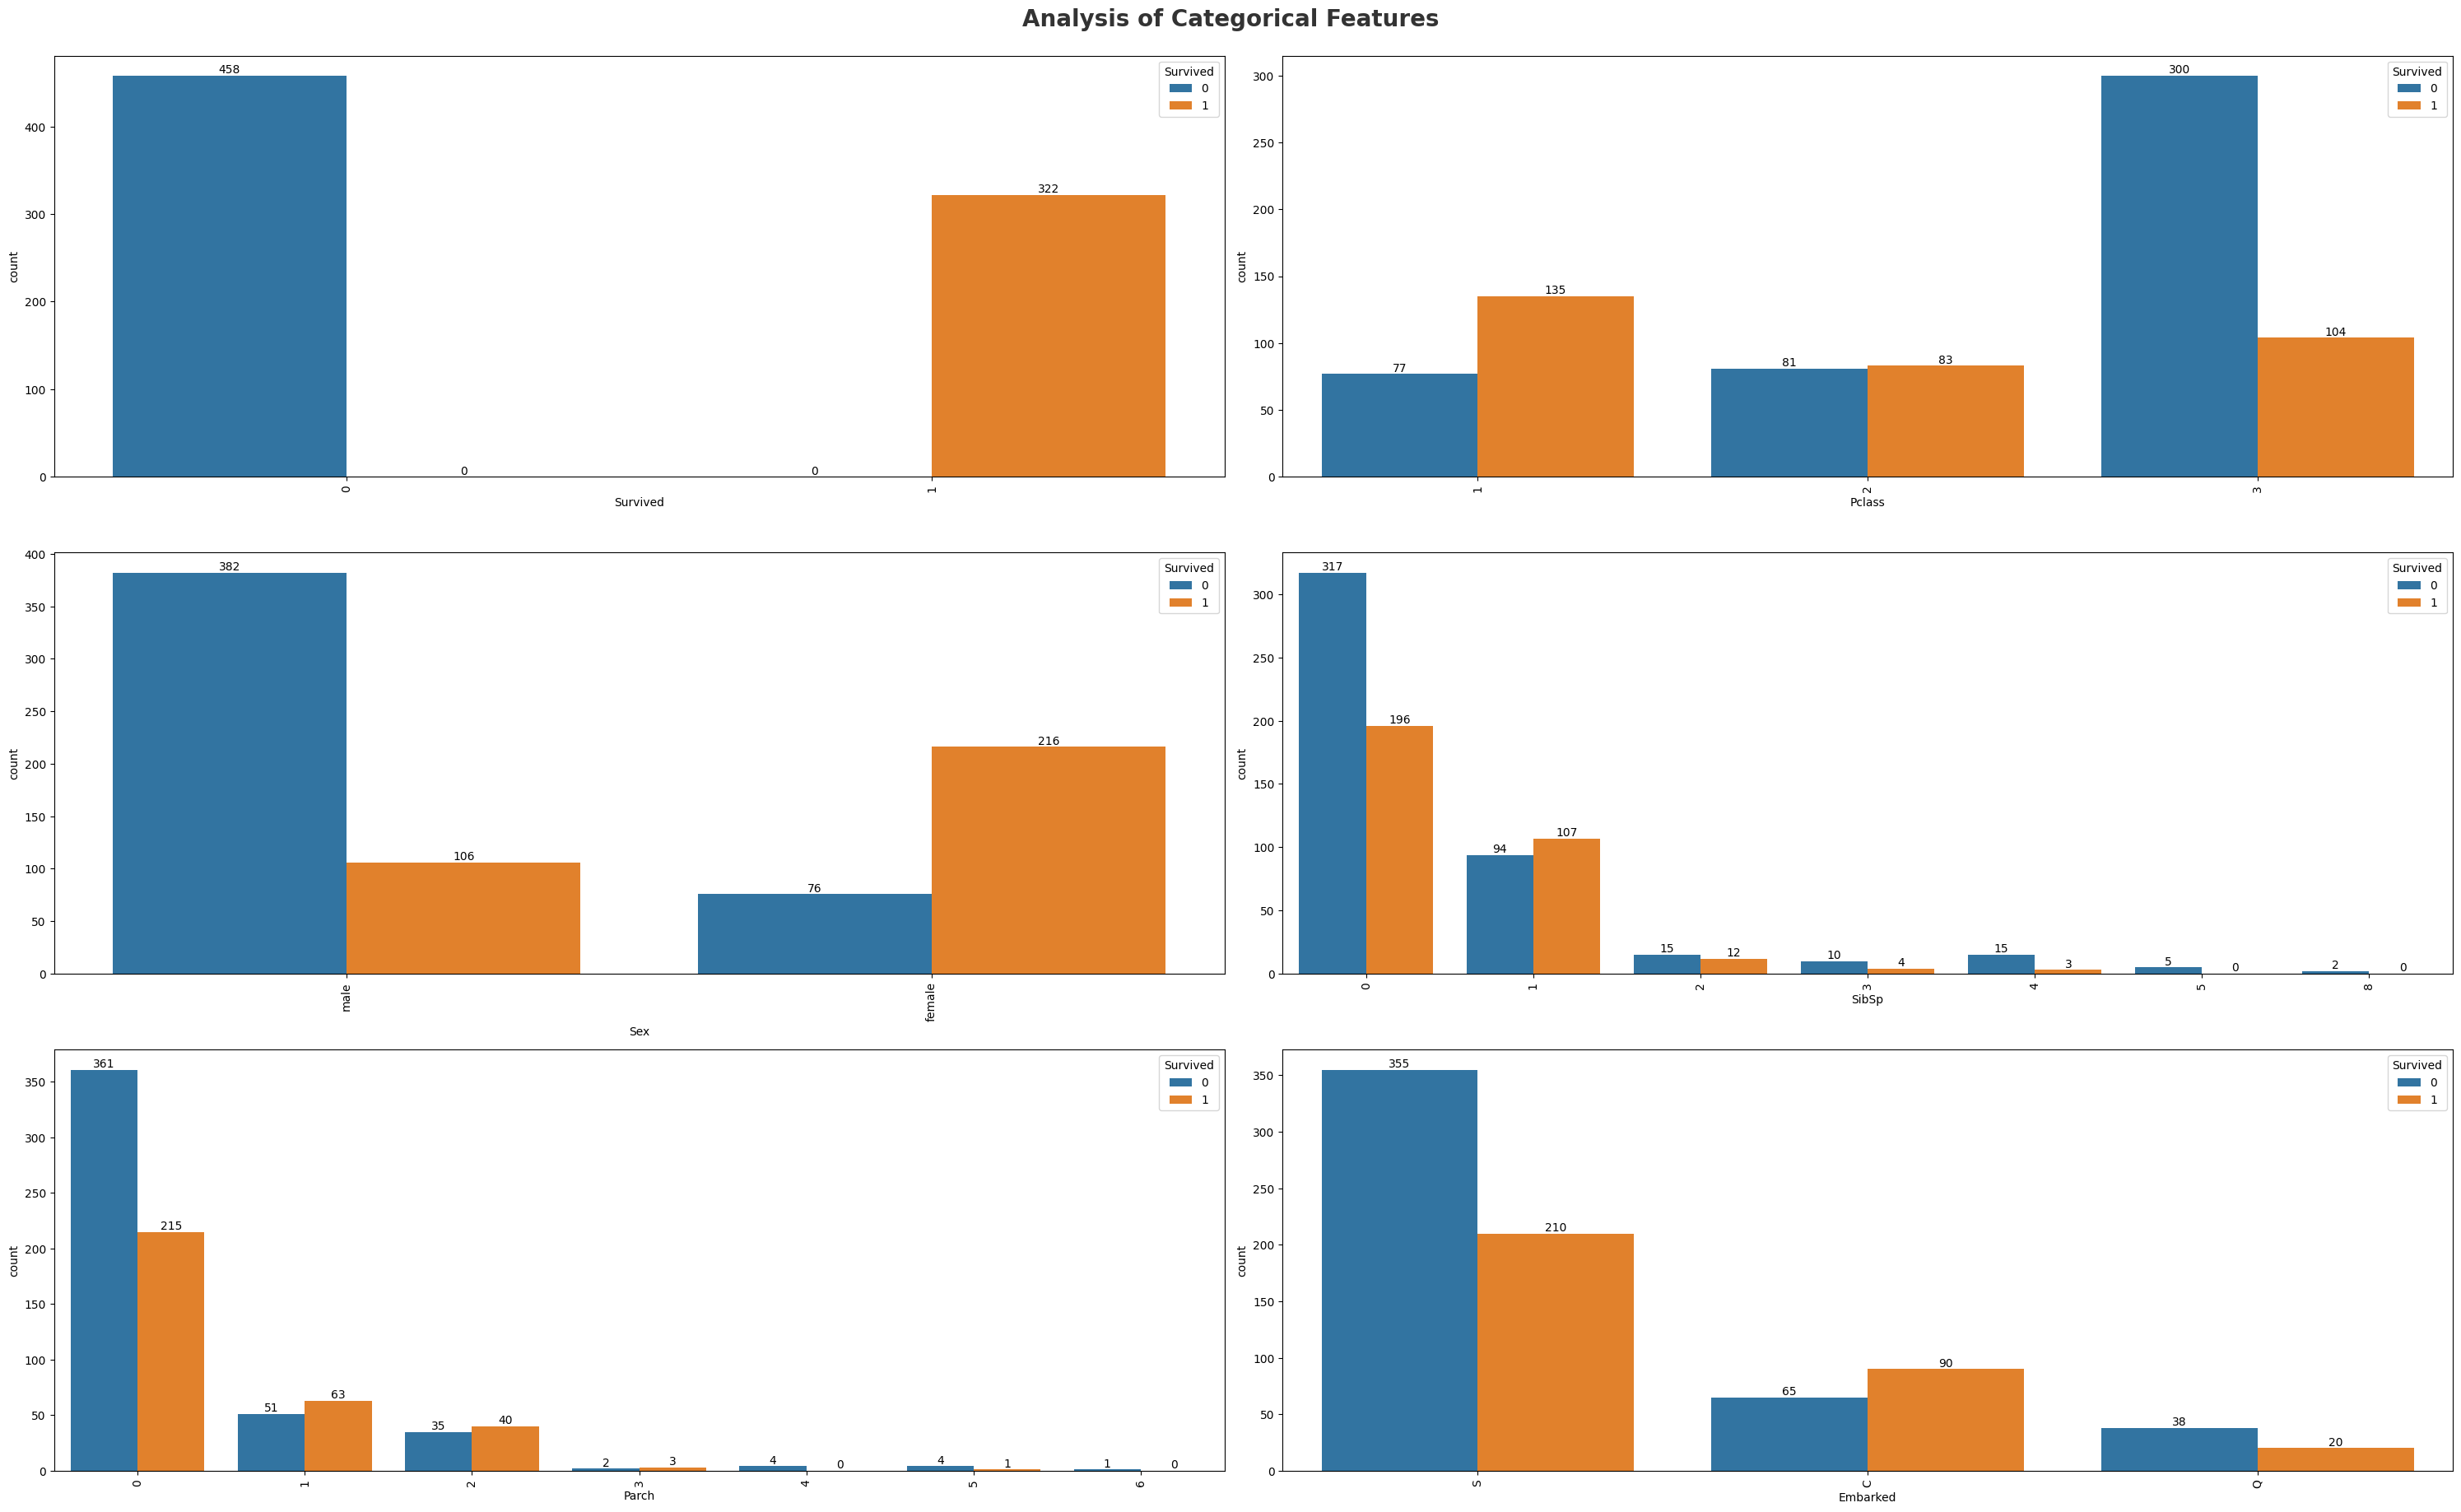

In [24]:
# Bivariate Analysis of Categorical Features
plt.figure(figsize=(30, 30))
plt.suptitle('Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat)):
    plt.subplot(5, 2, i+1)
    img=sns.countplot(x=cat[i],data=train,hue='Survived')
    plt.xticks(rotation=90);
    for container in img.containers:
        img.bar_label(container);
    plt.xlabel(cat[i])
    plt.tight_layout()


#### Insights
    - comapared to females, msle are mostly survied.",
    - lower class passengers had a lower chance of survival.
    - There is no correlation between blood sugar level and heart disease.",
    - abnormal rest ecg have more chance of heart disease.",
    - If you have chest pain while doing any phyisical activity, it may beacuse of underlying heart diseases."

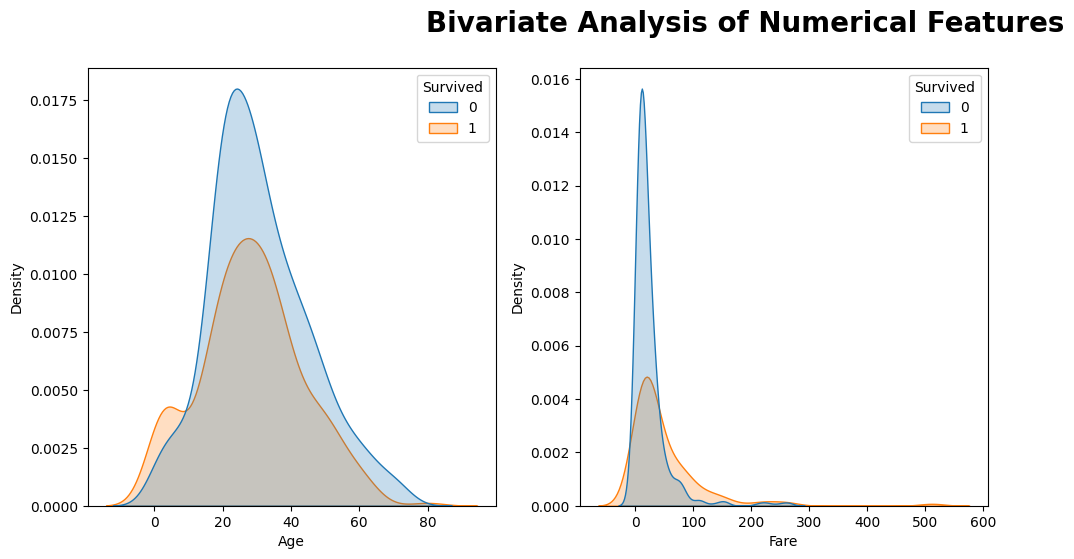

In [25]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1, y=1)
j1 = len(cat)
for i in range(0, len(num)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=num[i],shade=True, color='b',data=train,hue='Survived')
    plt.xlabel(num[i])
    plt.tight_layout()



We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%

There is also a marginal relationship between the fare and survial rate.

I have quantified the above relationships further in the last statsical modelling section

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

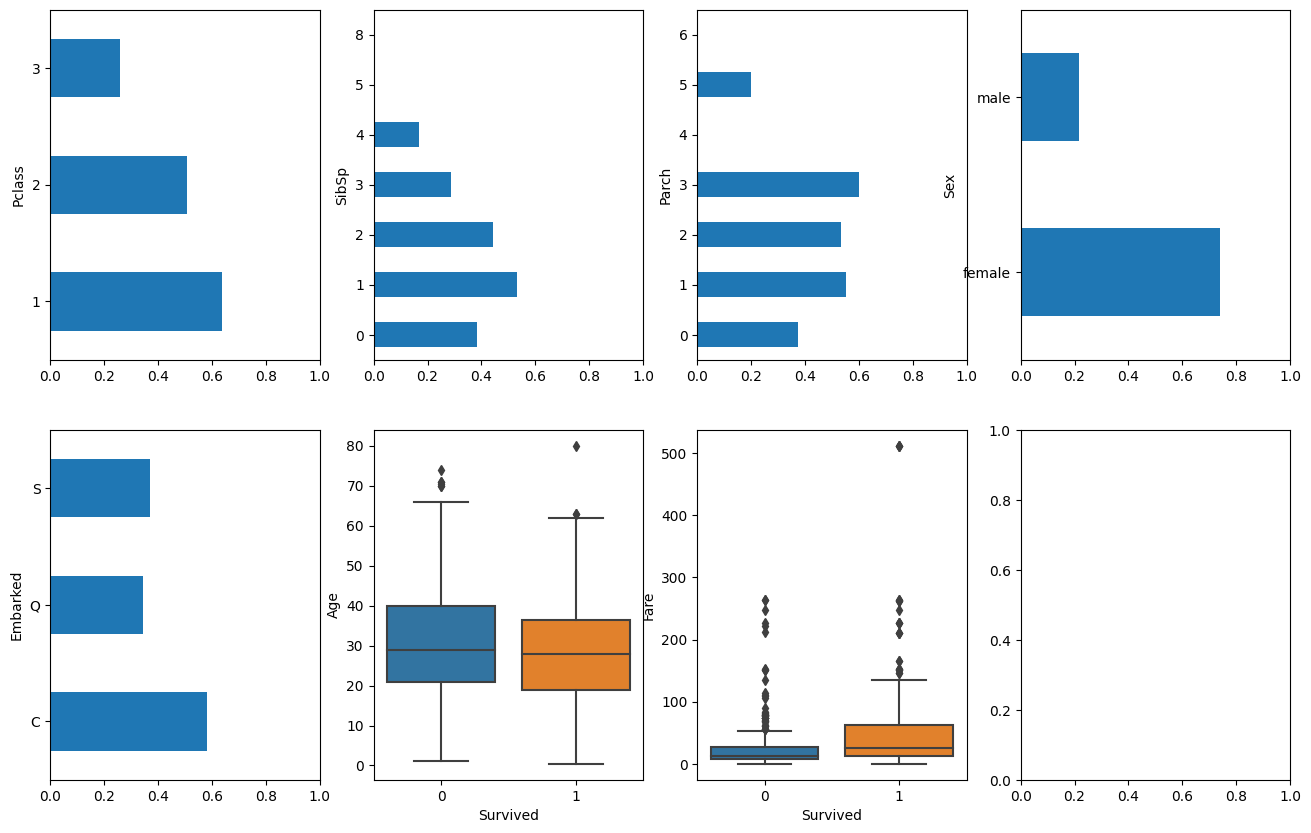

In [26]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

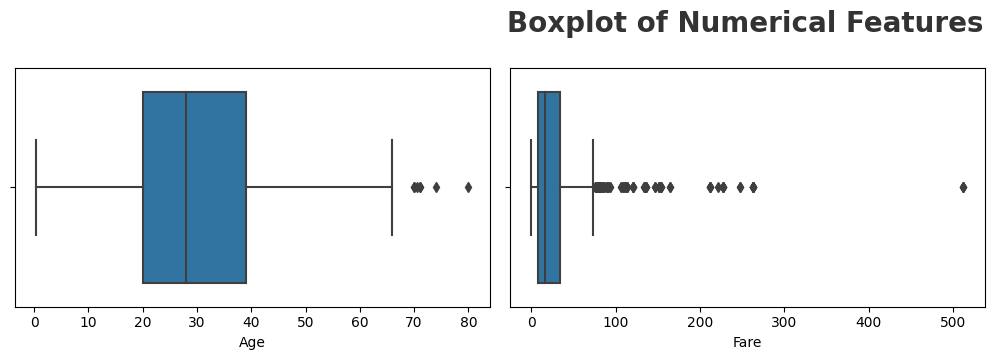

In [27]:

plt.figure(figsize=(15, 15))
plt.suptitle('Boxplot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=train[num[i]])
    plt.xlabel(num[i])
    plt.tight_layout()

###  Report.
we have outliers in Age,Fare.  
Distribution is almost normal Age

### What is the relation of age with heart disease?

<AxesSubplot:xlabel='Age', ylabel='Survived'>

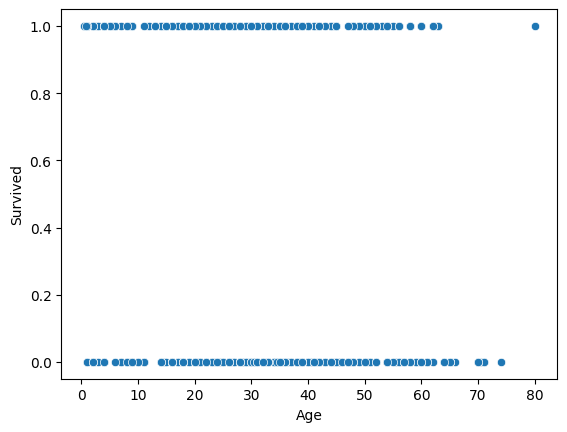

In [28]:
sns.scatterplot(x='Age',y='Survived',data=train)

#### Insight  
There is no relation between Age and Survived.

### Multivariate Analysis

<AxesSubplot:>

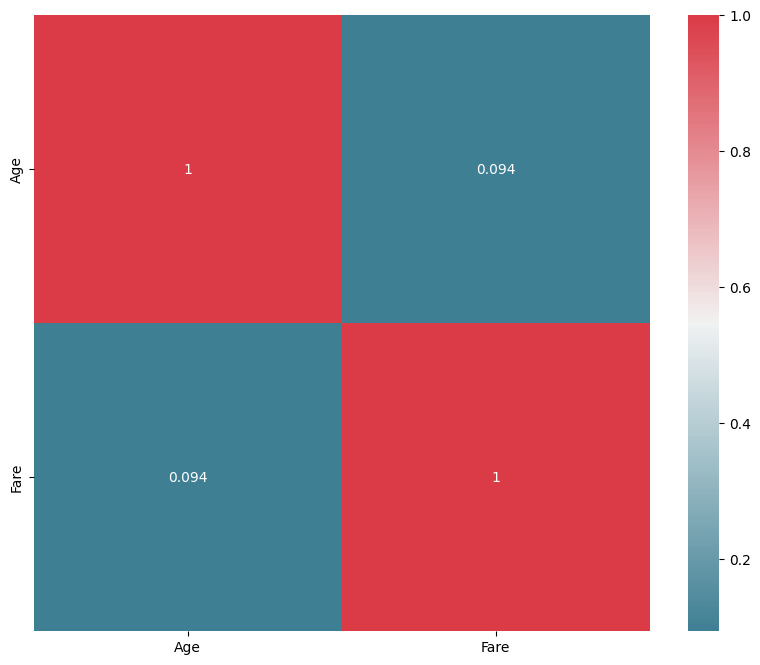

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot = True, ax=ax)

There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

There is a negative coorelation between Fare and Pclass, Age and Plcass

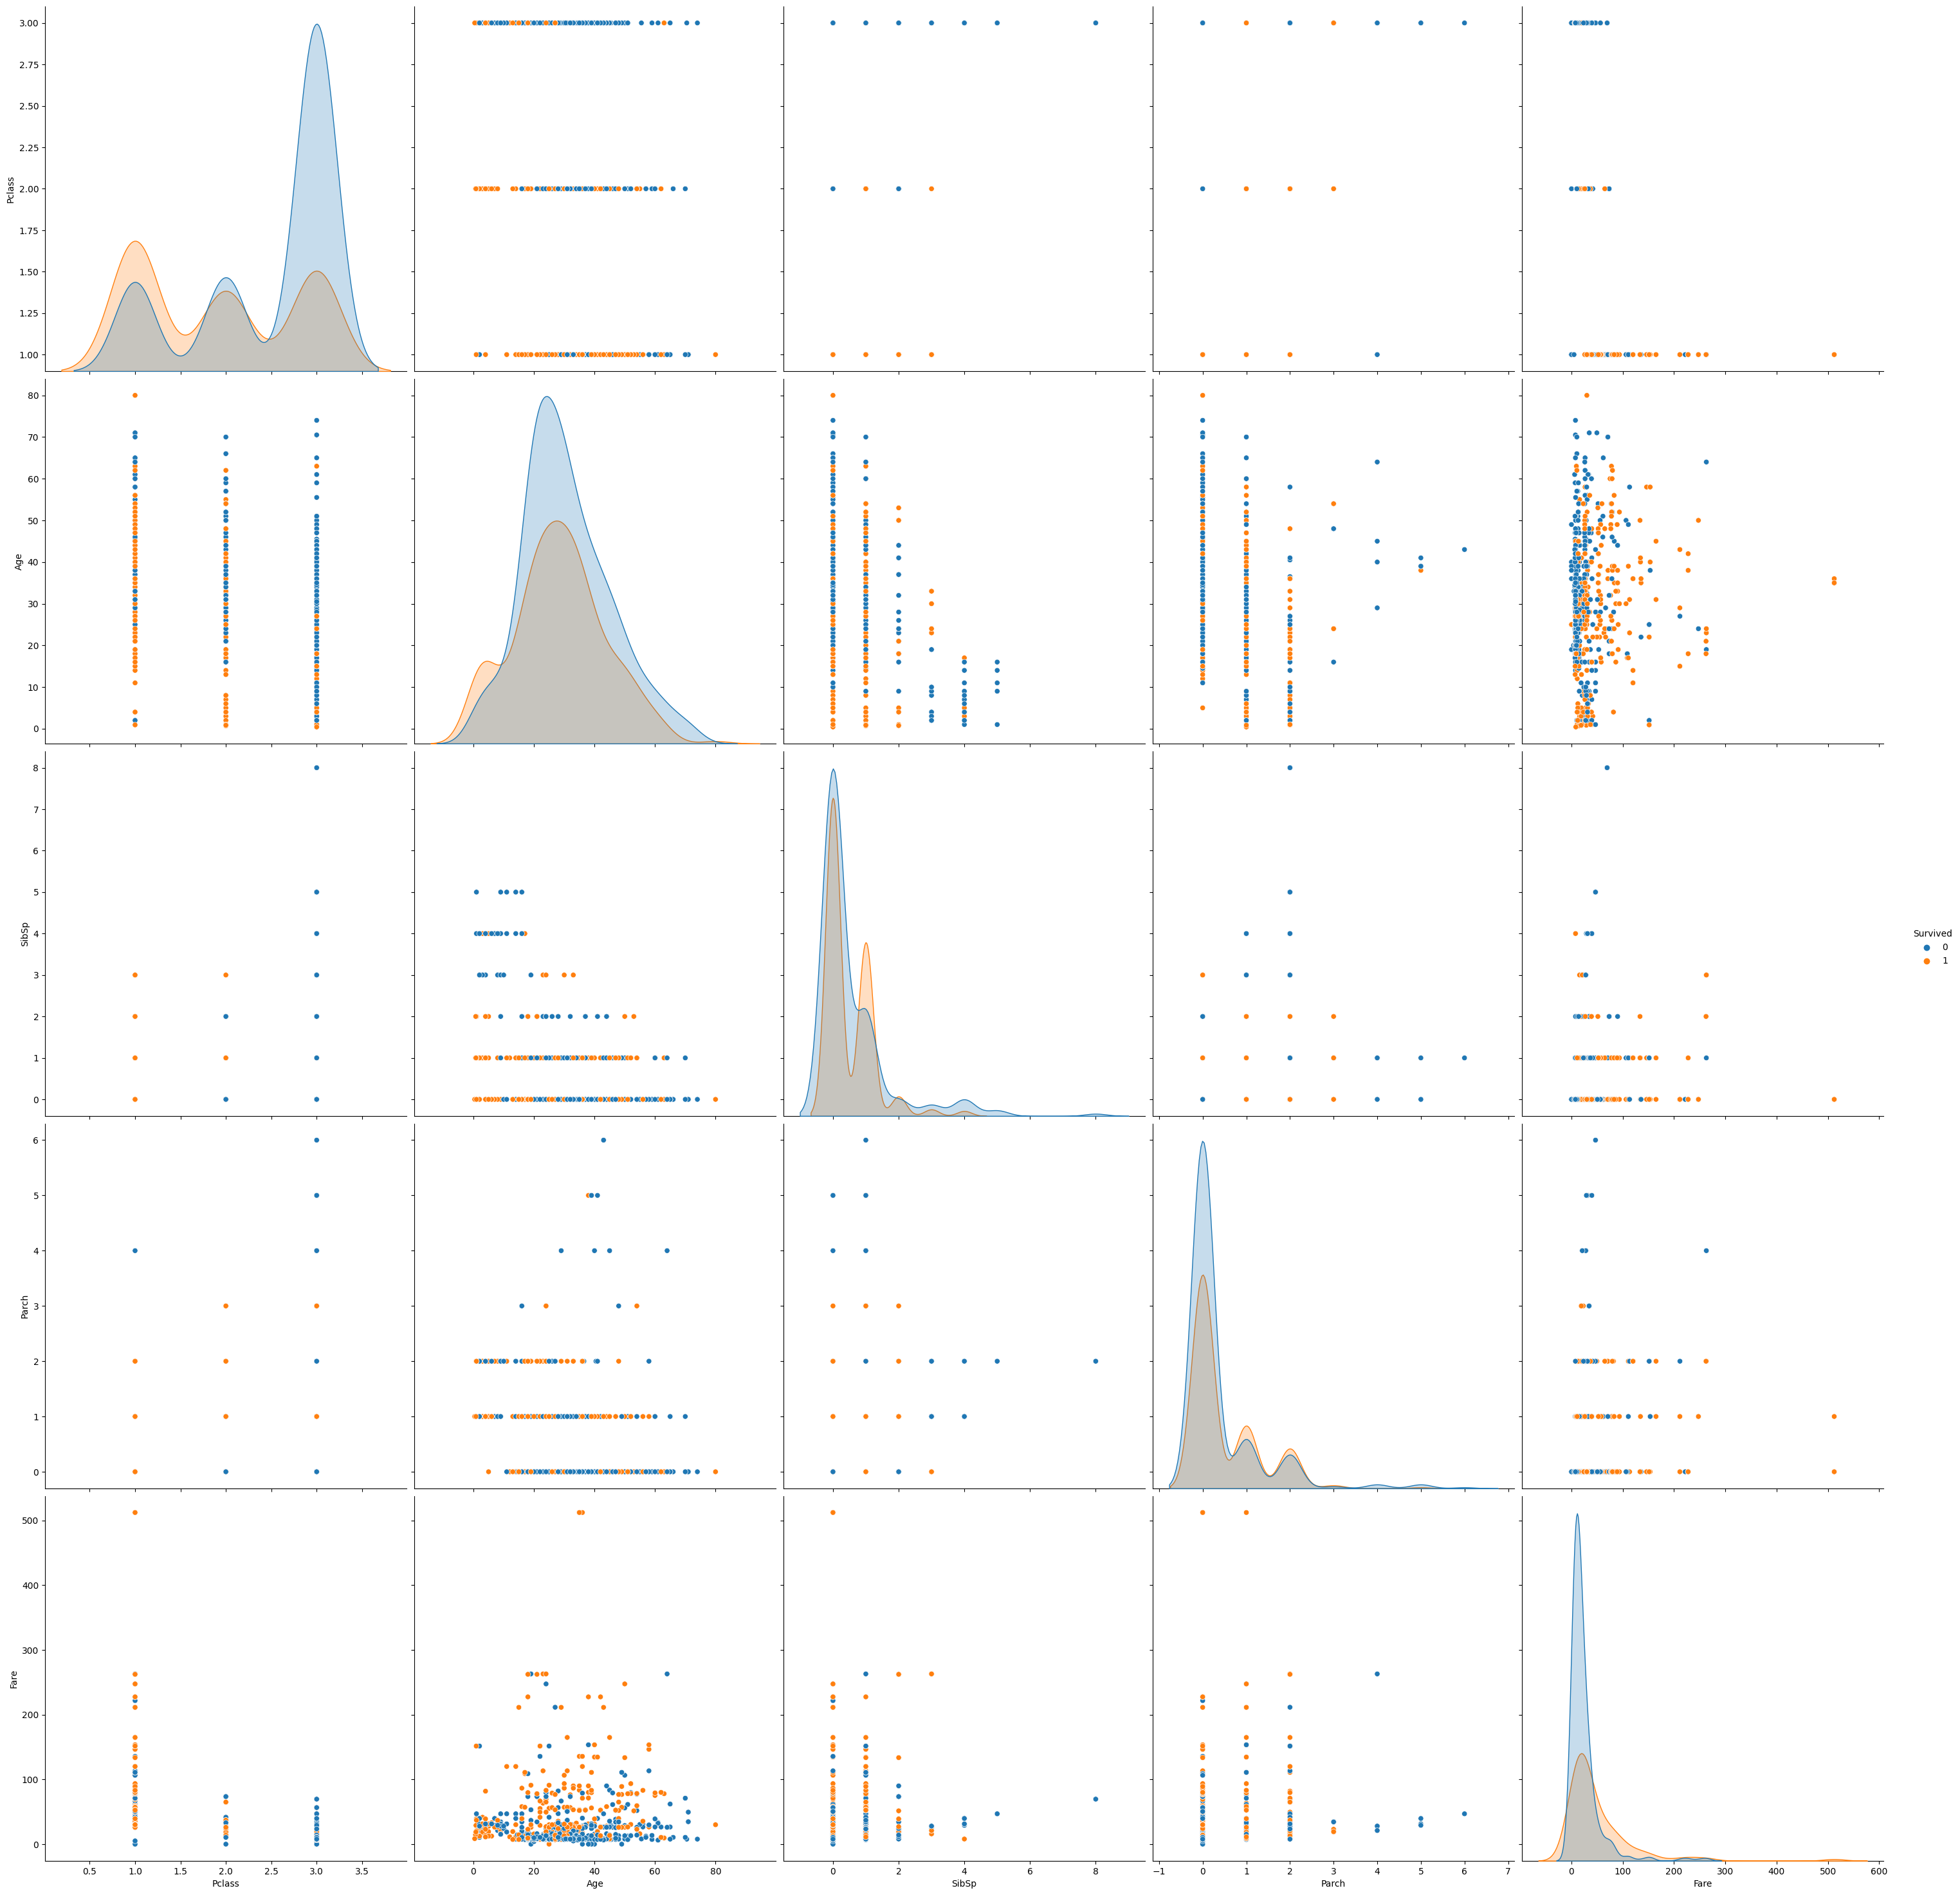

In [30]:
sns.pairplot(train,hue="Survived",height=6)

<AxesSubplot:>

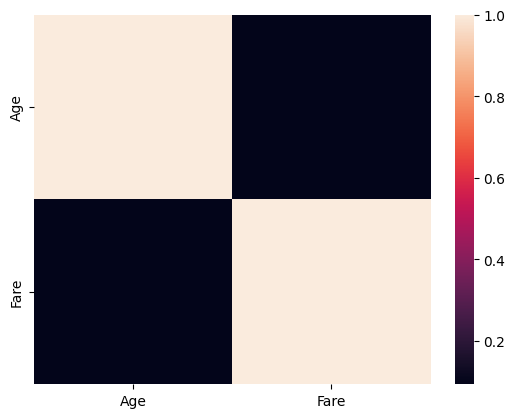

In [31]:
sns.heatmap(train.corr(),)

## Feature Engineering
Scaling, Standardizing and Transformation are important steps of numeric feature engineering and they are being used to treat skewed features and rescale them for modelling. Machine Learning & Deep Learning algorithms are highly dependent on the input data quality. 


###  Fill Nulls

In [32]:
train.Age = train.Age.fillna(train.Age.mean())
train.Embarked = train.Embarked.fillna("S")
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
train.skew()

Survived    0.354825
Pclass     -0.494364
Age         0.394081
SibSp       3.046805
Parch       2.624282
Fare        4.561010
dtype: float64

In [35]:
train.kurtosis()

Survived    -1.878923
Pclass      -1.452747
Age          0.575804
SibSp       12.693940
Parch        8.909622
Fare        30.075101
dtype: float64

#### Fare has a lots of skewness and kurtosis which means they have a huge tail in the distribution and will cause a lot of problems in making a good model


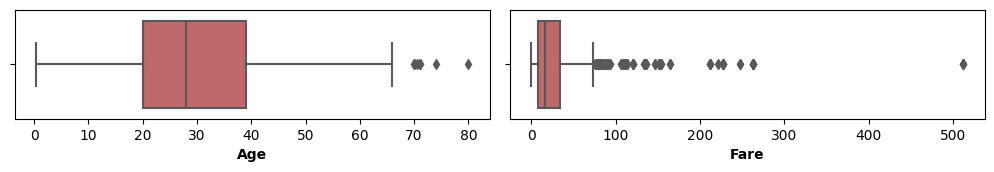

In [36]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features.columns):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=numeric_features[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [37]:
df1 = train.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [38]:
for col in numeric_features:
    remove_outliers_IQR(col)

percentile25 21.75
percentile75 36.0
Upper limit 57.375
Lower limit 0.375
percentile25 8.05
percentile75 34.375
Upper limit 73.8625
Lower limit -31.437499999999996


In [39]:
train = df1.copy()

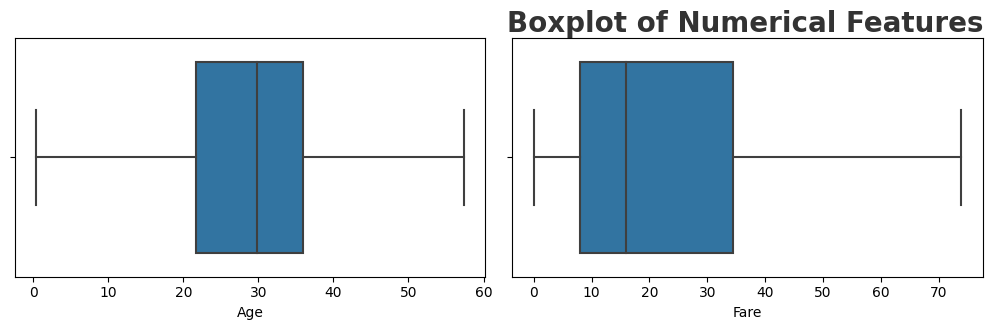

In [40]:
plt.figure(figsize=(15, 15))
plt.suptitle('Boxplot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=train[num[i]])
    plt.xlabel(num[i])
    plt.tight_layout()

# Convert Non-Numeric to Numeric Using label encoders

# Categorical Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
train[train.select_dtypes(include=['object']).columns] = train[train.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [43]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [44]:
X = train.copy()


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train ,test = train_test_split(X, test_size = .2)

In [47]:
test.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [48]:
train_x = train.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
train_y = train.loc[:,['Survived']]

In [49]:
test_x = test.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
test_y = test.loc[:,['Survived']]

### Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## Modelling

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(train_x,train_y)

LogisticRegression()

In [54]:
predictions = logmodel.predict(test_x)

In [55]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(test_y,predictions)
matrix

array([[70,  3],
       [24, 59]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_y,predictions)
accuracy * 100


82.6923076923077

In [57]:
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

## Evaluation Matrix

Evaluation
We can check precision,recall,f1-score using classification report!

In [58]:
from sklearn.metrics import classification_report
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        73
           1       0.95      0.71      0.81        83

    accuracy                           0.83       156
   macro avg       0.85      0.83      0.83       156
weighted avg       0.85      0.83      0.83       156



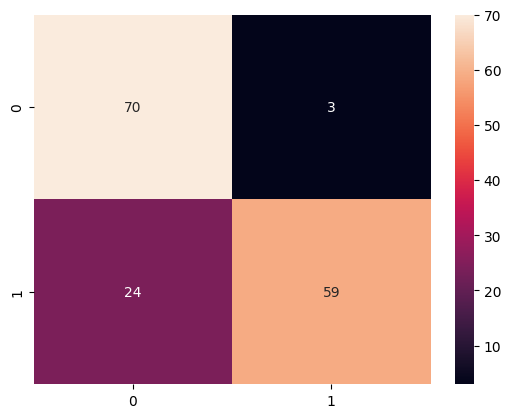

In [59]:
sns.heatmap(matrix, annot=True,  fmt='');

## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x,train_y)
score = knn.score(train_x,train_y)
score * 100

82.8525641025641

In [62]:
y_pred = knn.predict(test_x)

In [63]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0])

In [64]:
training_accuracy  = []
test_accuracy = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x,train_y)
    training_accuracy.append(knn.score(train_x,train_y))
    test_accuracy.append(knn.score(test_x,test_y))  

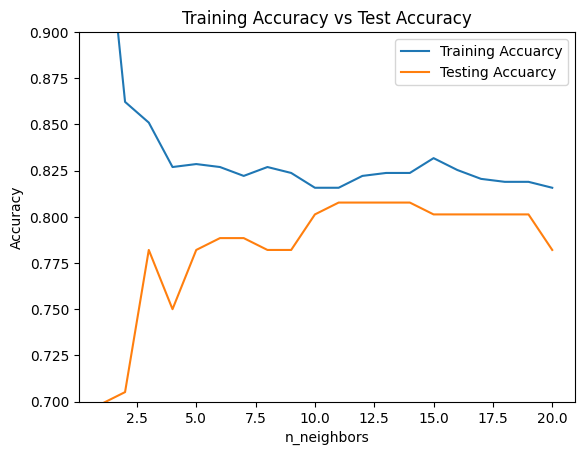

In [65]:
plt.figure()
plt.plot(range(1, 21), training_accuracy, label='Training Accuarcy')
plt.plot(range(1, 21), test_accuracy, label='Testing Accuarcy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])
plt.legend(loc='best')
plt.show()